# 🏠 House Price Prediction using Linear Regression

"""
📘 Objective:
This project uses the California Housing Prices dataset to predict
the median house value for districts in California.

We’ll analyze relationships between features like:
- median_income
- housing_median_age
- location (longitude & latitude)

and build a regression model to predict house prices.
"""


In [9]:
# === Cell 1: Upload dataset from your computer ===
from google.colab import files
import pandas as pd

# Choose the file you downloaded from Kaggle (e.g., california_housing.csv)
uploaded = files.upload()

# Read the uploaded file (it will take the first uploaded filename automatically)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Dataset shape:", df.shape)
df.head()


Saving california_housing_Data_before_cleaning.csv to california_housing_Data_before_cleaning.csv
Dataset shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


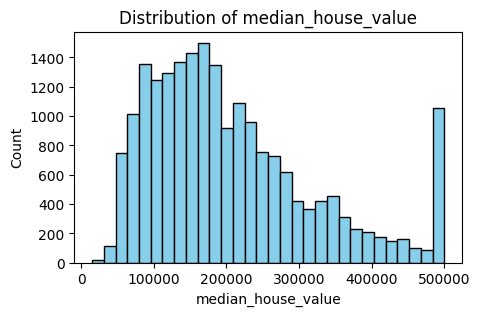

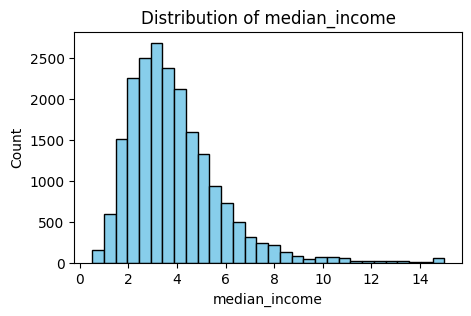

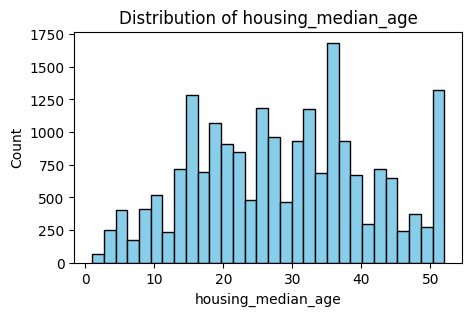

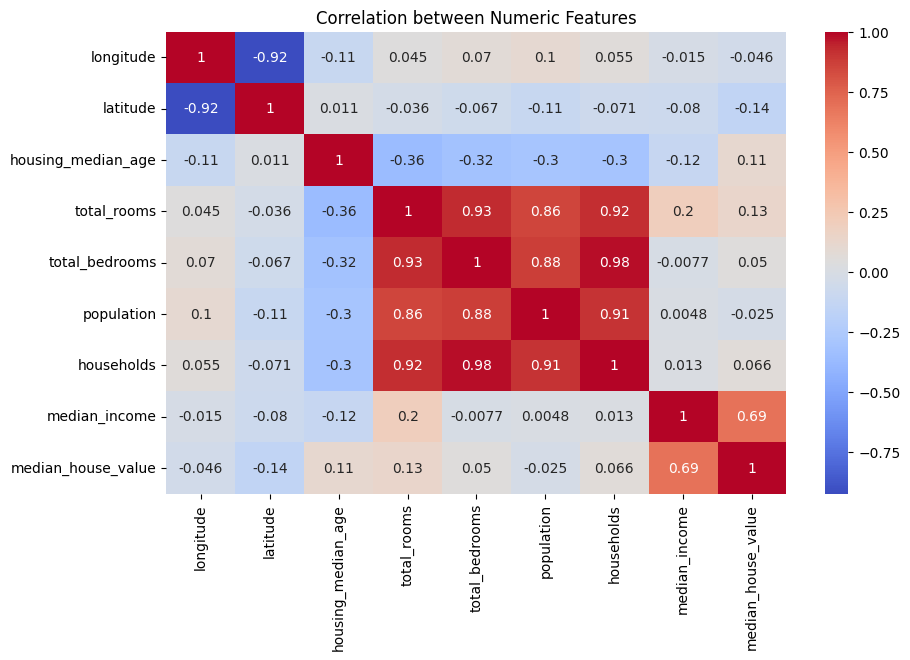

In [18]:
# === Cell 2: Basic visualizations ===
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for main numeric columns
for col in ["median_house_value", "median_income", "housing_median_age"]:
    plt.figure(figsize=(5,3))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Compute correlation only for numeric columns
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()


In [19]:
# === Cell 3: Prepare features and target ===
from sklearn.model_selection import train_test_split

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Numeric columns:", list(numeric_cols))
print("Categorical columns:", list(cat_cols))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Numeric columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical columns: ['ocean_proximity']


In [12]:
# === Apply feature engineering ONLY on training and test sets ===

def add_features(df):
    df = df.copy()
    df["rooms_per_household"] = df["total_rooms"] / df["households"]
    df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
    df["population_per_household"] = df["population"] / df["households"]
    return df

X_train = add_features(X_train)
X_test  = add_features(X_test)

print("Train shape after features:", X_train.shape)
print("Test shape after features:", X_test.shape)


Train shape after features: (16512, 12)
Test shape after features: (4128, 12)


In [14]:
# === Cell 5: Build a Linear Regression model ===
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Numeric & categorical preprocessing
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_cols),
    ('cat', cat_pipe, cat_cols)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
print("✅ Model trained successfully!")


✅ Model trained successfully!


RMSE: 70059.19
R² Score: 0.6254


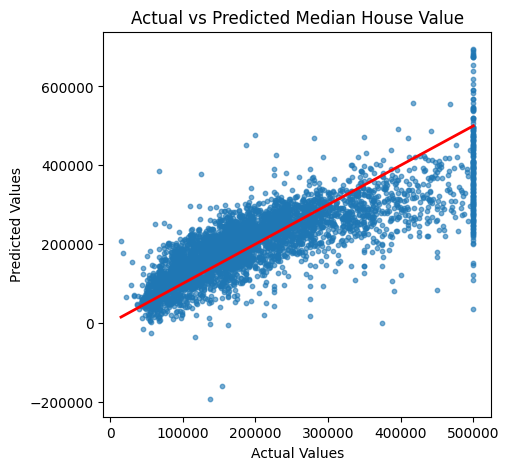

In [15]:
# === Cell 6: Evaluate performance ===
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=10, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Median House Value")
plt.show()


"""
📊 Conclusion:
- The Linear Regression model achieved an R² around ~0.6, meaning it explains about 60% of the variation in house prices.
- Median income was the strongest predictor of house value.
- Geographic features (latitude/longitude) also influenced price.

⚙️ Model Limitations:
- Linear Regression assumes linear relationships and may underfit complex data.
- No interaction or polynomial terms were used.
- Outliers and heteroscedasticity may affect prediction accuracy.

🚀 Possible Improvements:
- Try more advanced models (RandomForest, XGBoost, etc.).
- Use cross-validation for better performance estimation.
- Add polynomial or interaction features to capture nonlinear effects.
"""


In [16]:
# ---Save the cleaned data to CSV file ---
cleaned_filename = "california_housing_cleaned.csv"
df.to_csv(cleaned_filename, index=False)
print("✅ Cleaned data saved as:", cleaned_filename)

# --- Step 2: Download it to your local machine ---
from google.colab import files
files.download(cleaned_filename)


✅ Cleaned data saved as: california_housing_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# === Save combined TRAIN and TEST datasets ===
import pandas as pd
from google.colab import files

# Combine features and target
train_df = X_train.copy()
train_df["median_house_value"] = y_train

test_df = X_test.copy()
test_df["median_house_value"] = y_test

# Save as CSV
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("Train/Test files saved.")

# Download the files
files.download("train_data.csv")
files.download("test_data.csv")


Train/Test files saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>